# Exercício KNN com dataset prostate cancer

#### Início do uso do KNN com dataset prostate_cancer

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

#### Carregamento dos dados via csv e não via sklearn

In [94]:
pc = pd.read_csv('Prostate_Cancer.csv')

#### Verificando as variáveis disponíveis no dataset

In [120]:
pc.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

#### Data são os dados e target são as classes
- Dados aqui são radius,texture, perimeter, area, smoothness, compactness, symmetry e fractal_dimension
- Target são as classes possíveis: M ou B. Maligno ou Benigno

#### Verificação da quantidade de colunas e linhas do dataset:

In [98]:
pc.shape

(100, 10)

Temos 100 linhas e 10 colunas

#### Divisão dos dados e target
- x serão as colunas com os dados
- y serão as classes possíveis

In [99]:
pc_data = pc.iloc[:,2:10].values
pc_target = pc['diagnosis_result'].values

In [100]:
type(pc_data)

numpy.ndarray

In [101]:
type(pc_target)

numpy.ndarray

In [115]:
pc_data

array([[2.300e+01, 1.200e+01, 1.510e+02, 9.540e+02, 1.430e-01, 2.780e-01,
        2.420e-01, 7.900e-02],
       [9.000e+00, 1.300e+01, 1.330e+02, 1.326e+03, 1.430e-01, 7.900e-02,
        1.810e-01, 5.700e-02],
       [2.100e+01, 2.700e+01, 1.300e+02, 1.203e+03, 1.250e-01, 1.600e-01,
        2.070e-01, 6.000e-02],
       [1.400e+01, 1.600e+01, 7.800e+01, 3.860e+02, 7.000e-02, 2.840e-01,
        2.600e-01, 9.700e-02],
       [9.000e+00, 1.900e+01, 1.350e+02, 1.297e+03, 1.410e-01, 1.330e-01,
        1.810e-01, 5.900e-02],
       [2.500e+01, 2.500e+01, 8.300e+01, 4.770e+02, 1.280e-01, 1.700e-01,
        2.090e-01, 7.600e-02],
       [1.600e+01, 2.600e+01, 1.200e+02, 1.040e+03, 9.500e-02, 1.090e-01,
        1.790e-01, 5.700e-02],
       [1.500e+01, 1.800e+01, 9.000e+01, 5.780e+02, 1.190e-01, 1.650e-01,
        2.200e-01, 7.500e-02],
       [1.900e+01, 2.400e+01, 8.800e+01, 5.200e+02, 1.270e-01, 1.930e-01,
        2.350e-01, 7.400e-02],
       [2.500e+01, 1.100e+01, 8.400e+01, 4.760e+02, 1.1

In [103]:
pc_target

array(['M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'], dtype=object)

#### Substituição dos valores M e B por 0 e 1
Como
- 0 = Benigno
- 1 = Maligno

In [105]:
pc_target[pc_target=='M']=1
pc_target[pc_target=='B']=0
pc_target

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=object)

#### conversão dos numpy arrays para float e int respectivamente
- sklearn não reconhece o tipo objeto

In [106]:
pc_data=pc_data.astype('float')
pc_target=pc_target.astype('int')

In [116]:
type(pc_target)

numpy.ndarray

#### Escolha das colunas para uso 

In [108]:
columns_data = ["radius","texture","perimeter","area","smoothness","compactness","symmetry","fractal_dimension"]
columns_data

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'symmetry',
 'fractal_dimension']

In [109]:
df_pc_data = pd.DataFrame(pc_data, columns=columns_data)
df_pc_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23.0,12.0,151.0,954.0,0.143,0.278,0.242,0.079
1,9.0,13.0,133.0,1326.0,0.143,0.079,0.181,0.057
2,21.0,27.0,130.0,1203.0,0.125,0.160,0.207,0.060
3,14.0,16.0,78.0,386.0,0.070,0.284,0.260,0.097
4,9.0,19.0,135.0,1297.0,0.141,0.133,0.181,0.059


#### Plot do gráfico scatter 

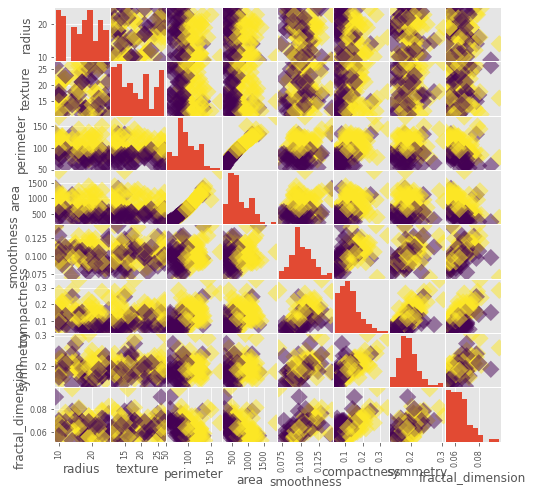

In [110]:
_ = pd.plotting.scatter_matrix(df_pc_data , c = pc_target, figsize = [8, 8], s=150, marker='D')

 - Maior correlação e separação de classes:
    - radius x perimeter
    - radius x area
    - texture x perimeter
    - texture x area
    - perimeter x texture

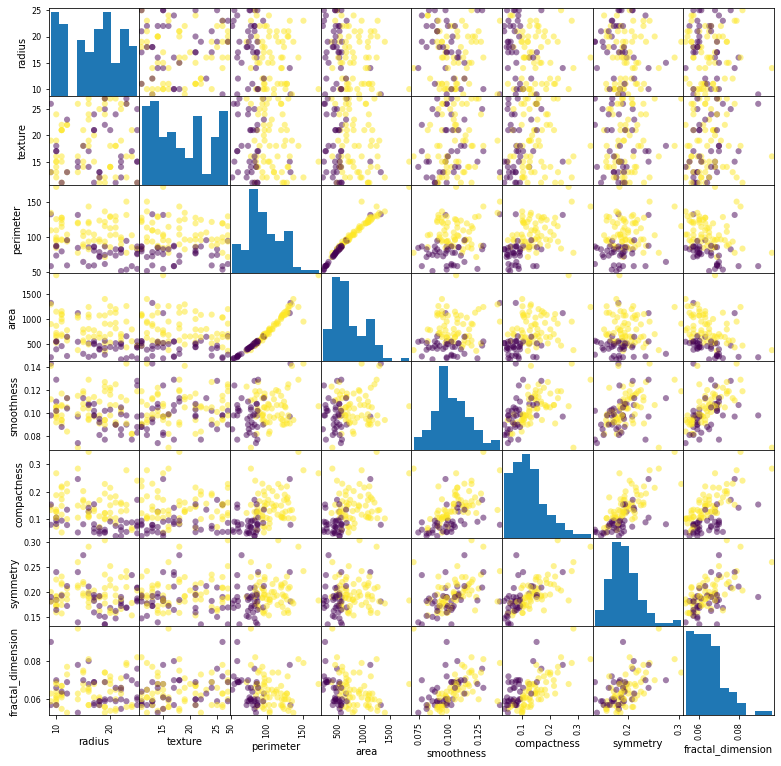

In [33]:
_ = pd.plotting.scatter_matrix(df_pc_data , c = pc_target, figsize = [13, 13], s=150)

## Definição fit - classificador com scikitlearn

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [61]:
knn.fit(pc_data, pc_target) #pc_data e pc_target foram convertidos para float e int respectivamente

KNeighborsClassifier(n_neighbors=7)

In [36]:
pc_data.shape

(100, 8)

In [37]:
pc_target.shape

(100,)

## Predição de dados não rotulados(caso haja conjunto de dados novo)

In [113]:
prediction = knn.predict(pc_some_data)

NameError: name 'pc_some_data' is not defined

## Medição da performance do modelo

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pc_data, pc_target, test_size=0.3, random_state=21, stratify=pc_target)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pc_target_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(pc_target_pred))

Test set predictions:
 [1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0]


In [63]:
knn.score(X_test, y_test)

0.8666666666666667

## Comparação entre número de vizinhos e score

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pc_data, pc_target, test_size=0.3, random_state=21, stratify=pc_target)
nbrs = []
score = []
for x in range(70):
    knn = KNeighborsClassifier(n_neighbors=x+1)
    knn.fit(X_train, y_train)
    pc_target_pred = knn.predict(X_test)
    nbrs.append(x+1)
    score.append(knn.score(X_test, y_test))
    #print("Test set predictions:\n {}".format(pc_target_pred))

In [124]:
np_nbrs = np.array(nbrs)
np_nbrs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [125]:
np_score = np.array(score)
np_score

array([0.73333333, 0.76666667, 0.83333333, 0.8       , 0.83333333,
       0.86666667, 0.86666667, 0.86666667, 0.86666667, 0.86666667,
       0.86666667, 0.9       , 0.9       , 0.9       , 0.9       ,
       0.9       , 0.9       , 0.9       , 0.9       , 0.9       ,
       0.86666667, 0.9       , 0.9       , 0.9       , 0.9       ,
       0.9       , 0.86666667, 0.86666667, 0.86666667, 0.9       ,
       0.86666667, 0.93333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.8       , 0.83333333, 0.8       , 0.83333333,
       0.83333333, 0.86666667, 0.83333333, 0.83333333, 0.83333333,
       0.86666667, 0.83333333, 0.86666667, 0.86666667, 0.9       ,
       0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333,
       0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333,
       0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333,
       0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333])

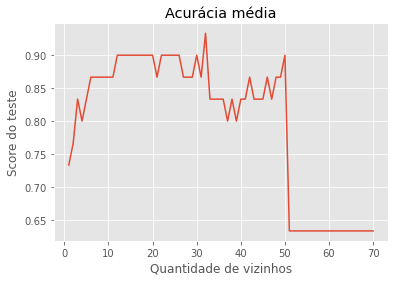

In [126]:
plt.title('Acurácia média')
plt.xlabel('Quantidade de vizinhos')
plt.ylabel('Score do teste')
plt.plot(np_nbrs,np_score)

## Complexidade do modelo

In [117]:
# arrays armazenamento,treuno e teste de precisão
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

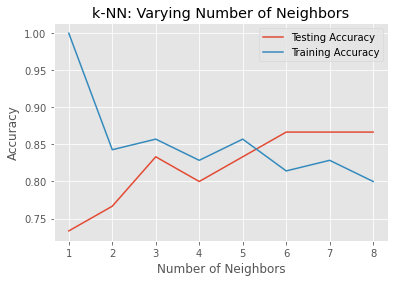

In [118]:
# Testando diferentes valores de k vizinhos
for i, k in enumerate(neighbors):
    #configura um classificador knn com k vizinhos
    knn = KNeighborsClassifier(n_neighbors=k)

    # adequa o classificador para os dados de treino
    knn.fit(X_train, y_train)
    
    #calcula a precisão do treino
    train_accuracy[i] = knn.score(X_train, y_train)

    #calcula a precisão do teste
    test_accuracy[i] = knn.score(X_test, y_test)

# plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()